# **Capstone project**

### **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

In [ ]:
path = '/content/drive/MyDrive/Collab Notebooks/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

### **Data exploration**

happy :


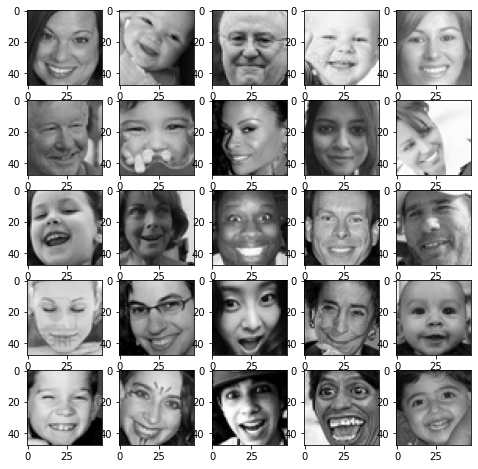

sad :


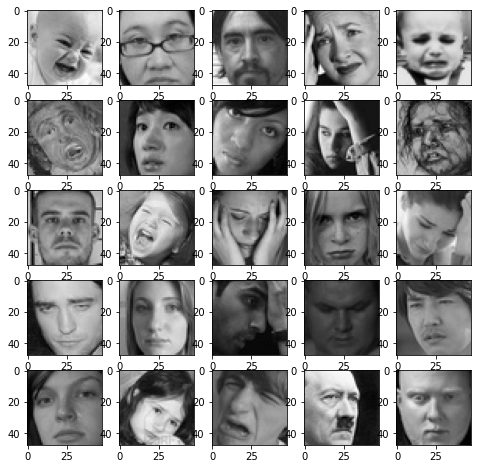

surprise :


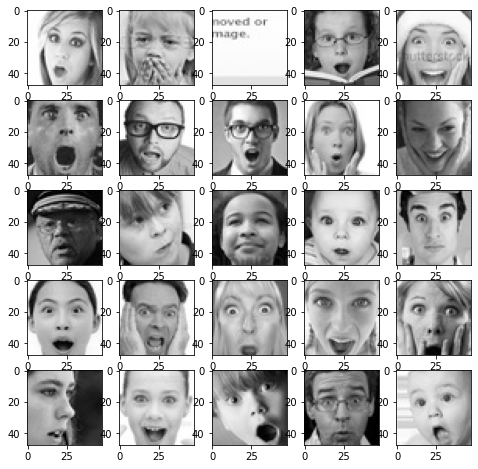

neutral :


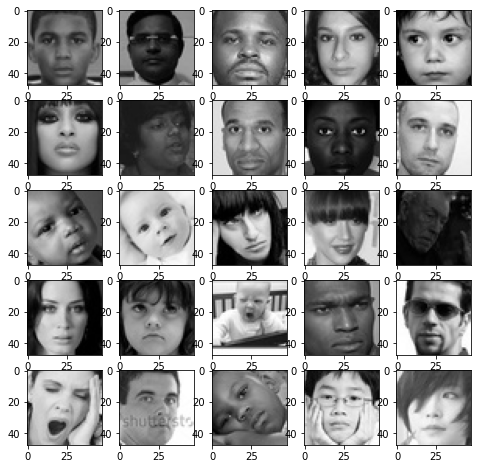

In [ ]:
classes = ['happy','sad','surprise','neutral']

for expression in classes:
  print(expression,":")
  plt.figure(figsize= (8,8))
  for i in range(1, 26):
      plt.subplot(5, 5, i)

      img = load_img(folder_path + "train/" + expression + "/" +
                    os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))

      plt.imshow(img)
  plt.show()


**Observations:**

- Happy: teeth showing can help identify happy people. A mouth curve upwards can be also be a sign that the person is happy. And when smiling, some wrinkles can be found under the eyes and next to the mouth (smaller more random detail, more difficult to detect).
- Sad: The eyes tend to be closer together or completely closed if the person is crying. The mouth is straight or curved downwards.
- Neutral: Open eyes and straight mouth no expression.
- Surprise:  Easier to identify, people with wide open mouth, hands on their cheeks or covering the mouth and/or very opened eyes.


In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


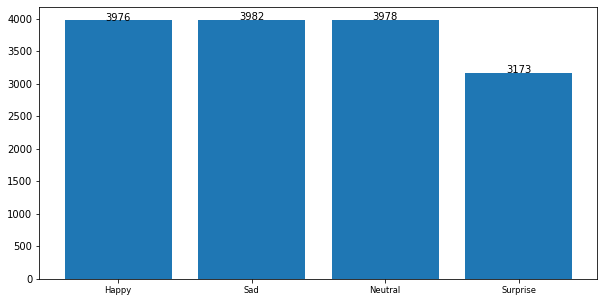

In [ ]:
#Histogram for emotion frequency in dataset
plt.figure(figsize = (10, 5))


# importing library
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}
df = pd.Series(data)
plt.bar(range(len(df)), df.values, align = 'center')
plt.xticks(range(len(df)), df.index.values, size = 'small')
addlabels(df.index.values, df.values)
plt.show()

**Observations:**

### **Data loading**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
total_samples = train_set.samples + validation_set.samples
print("Train-validation split:",round(train_set.samples/total_samples*100),"/",round(validation_set.samples/total_samples*100))

Train-validation split: 75 / 25


{'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}
Happy        8.0
Neutral      9.0
Sad         10.0
Surprise     5.0
dtype: float32
Batch size: 32.0


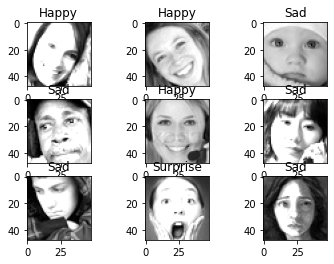

In [ ]:
#Check batch class distribution
batch = train_set.next()

print(train_set.class_indices)
batch_df = pd.DataFrame(data=batch[1], columns=["Happy","Neutral","Sad","Surprise"])
print(batch_df.sum(axis = 0))
print("Batch size:", batch_df.sum(axis = 0).sum())

#Plot images from the batch
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i)
  plt.title(batch_df.idxmax(1)[i])
	# plot raw pixel data
  plt.imshow(batch[0][i,:,:,0], cmap="gray")
# show the figure
plt.show()

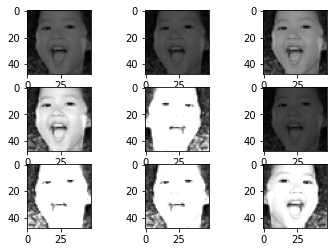

In [ ]:
#Check image data generator
# load the image
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    shear_range=0.3)

# load the image
img = load_img(folder_path+'train/happy/15874.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# Prepare iterator
it = datagen_train.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch_1image = it.next()
	# convert to unsigned integers for viewing
	image = batch_1image[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

### **Model building**

In [ ]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(filters=512, kernel_size=(2,2), padding='same', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(filters=512, kernel_size=(2,2), padding='same', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))

# Add 5th CNN Block
model3.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(Dropout(0.5))

# Second fully connected layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(Dropout(0.5))

model3.add(Dense(no_of_classes, activation = 'softmax'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       3

Epoch 1/35
473/473 [==============================] - 32s 41ms/step - loss: 1.5717 - accuracy: 0.2670 - val_loss: 1.3672 - val_accuracy: 0.3667
Epoch 2/35
473/473 [==============================] - 19s 40ms/step - loss: 1.3049 - accuracy: 0.3754 - val_loss: 1.1845 - val_accuracy: 0.4545
Epoch 3/35
473/473 [==============================] - 19s 40ms/step - loss: 1.1179 - accuracy: 0.5024 - val_loss: 0.9737 - val_accuracy: 0.5943
Epoch 4/35
473/473 [==============================] - 19s 40ms/step - loss: 1.0214 - accuracy: 0.5547 - val_loss: 1.0056 - val_accuracy: 0.5728
Epoch 5/35
473/473 [==============================] - 19s 39ms/step - loss: 0.9746 - accuracy: 0.5781 - val_loss: 0.9304 - val_accuracy: 0.5943
Epoch 6/35
473/473 [==============================] - 19s 41ms/step - loss: 0.9407 - accuracy: 0.6001 - val_loss: 0.8387 - val_accuracy: 0.6695
Epoch 7/35
473/473 [==============================] - 19s 39ms/step - loss: 0.9138 - accuracy: 0.6182 - val_loss: 1.0103 - val_accuracy:

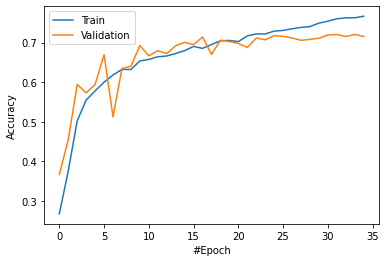

In [ ]:
#Compiling
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

#Compile and fit model
model3.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.003), metrics=["accuracy"])
history = model3.fit(x=train_set, validation_data=validation_set, epochs=35)

# Write your code to evaluate the model performance on the test set
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("#Epoch")
plt.legend(["Train","Validation"])
plt.show()

model3.save("network.h5")

### **Evaluating the Model on Test Set**

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.60      1.00      0.75         6
           2       0.75      0.33      0.46         9
           3       1.00      0.89      0.94         9

    accuracy                           0.72        32
   macro avg       0.74      0.74      0.70        32
weighted avg       0.75      0.72      0.70        32



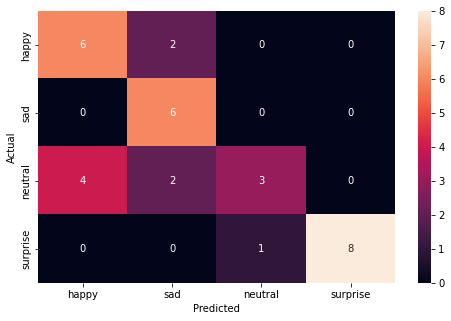

In [ ]:
from tensorflow import keras
model3 = keras.models.load_model('network.h5')

# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

#Get prediction labels instead of indexes
index_dict = {0:'Happy',1:'Neutral',2:'Sad',3:'Surprise'}

def replace(list, dictionary):
    return [dictionary.get(item, item) for item in list]
y_true_labels = replace(y_true, index_dict)

# Printing the classification report
print(classification_report(y_true, y_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

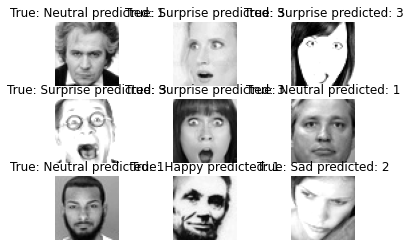

In [ ]:
#Plot images from the batch
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i)
  title = "True: "+str(y_true_labels[i])+" predicted: "+str(y_pred[i])
  plt.title(title)

  plt.axis('off')
	# plot raw pixel data
  plt.imshow(test_images[i,:,:,0], cmap="gray")
# show the figure
plt.show()

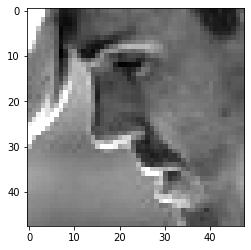

True class:  Sad
Happy 44.0%
Neutral 25.3%
Sad 29.0%
Surprise 1.7%


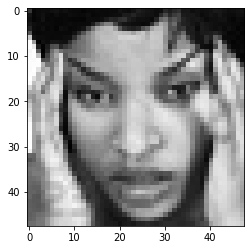

True class:  Sad
Happy 0.2%
Neutral 58.6%
Sad 40.9%
Surprise 0.3%


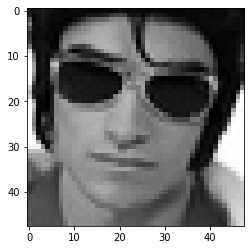

True class:  Sad
Happy 2.3%
Neutral 96.0%
Sad 1.7%
Surprise 0.0%


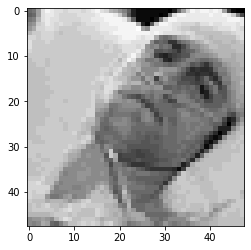

True class:  Sad
Happy 42.5%
Neutral 15.1%
Sad 26.2%
Surprise 16.2%


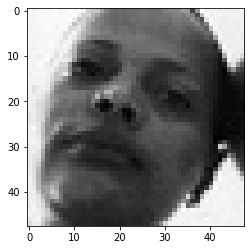

True class:  Sad
Happy 45.9%
Neutral 39.1%
Sad 14.1%
Surprise 1.0%


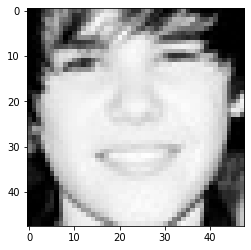

True class:  Happy
Happy 34.7%
Neutral 53.4%
Sad 11.5%
Surprise 0.4%


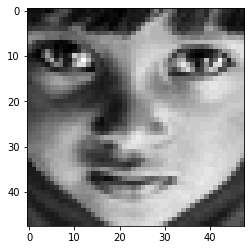

True class:  Sad
Happy 53.3%
Neutral 26.9%
Sad 11.1%
Surprise 8.7%


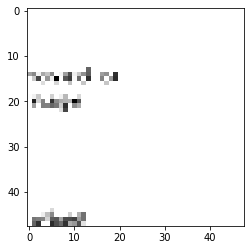

True class:  Happy
Happy 28.9%
Neutral 33.9%
Sad 24.4%
Surprise 12.9%


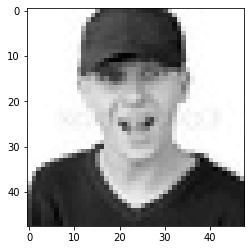

True class:  Surprise
Happy 0.8%
Neutral 20.2%
Sad 78.9%
Surprise 0.1%


In [ ]:
  predDf = pd.DataFrame(pred, columns=["Happy","Neutral","Sad","Surprise"])
  for i in range(32):
    if y_pred[i] != y_true[i]:
      plt.imshow(test_images[i,:,:,0], cmap="gray")
      plt.show()
      print("True class: ",y_true_labels[i])
      image_pred = predDf.iloc(0)[i]
      for j in range(len(image_pred)):
        result = f'{image_pred[j]:.1%}'
        print(image_pred.index[j], result)

In [ ]:
#batch_df = pd.DataFrame(data=batch[1], columns=["Happy","Neutral","Sad","Surprise"])
pred = model3.predict(test_images)
np.argmax(pred, axis = 1)

array([0, 1, 2, 1, 3, 3, 0, 2, 1, 1, 3, 3, 1, 3, 0, 0, 2, 3, 2, 1, 3, 1,
       0, 1, 1, 3, 2, 1, 2, 0, 3, 0])

**Observations:**
Good prediction accuracy 76%.
Highest F1 scores (accuracy+recall) for happy and surprised classes. Sad and neutral are more easily confused by the model.

Most common mistake is classifying sad faces as neutral emotions.

Training and hypertuning CNNs can be a complex procedure. This is an example where you can find better performance using a complex ANN model instead of a CNN transfer learning model.

The CNN VGG16 model can be further improved and explored as a second possibility for the model since CNN work usually better in image recognition than ANNs (local spatiality).